In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:/externship/notebook/household_power_consumption.txt",sep=';',header=0,infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'])

C:\Users\user\AppData\Local\Temp\ipykernel_3416\1359230009.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("D:/externship/notebook/household_power_consumption.txt",sep=';',header=0,infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'])


In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.shape

(2075259, 7)

In [5]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
percent_missing=df.isnull().sum()*100/len(df)
missing_value_df=pd.DataFrame({'percent_missing':percent_missing})

In [7]:
missing_value_df

,percent_missing
Global_active_power,0.000000
Global_reactive_power,0.000000
Voltage,0.000000
Global_intensity,0.000000
Sub_metering_1,0.000000
Sub_metering_2,0.000000
Sub_metering_3,1.251844


In [8]:
df.loc[df.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [9]:
df.replace('?',np.nan,inplace=True)

In [10]:
df.loc[df.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df=df.dropna(how='all')

In [12]:
for i in df.columns:
    df[i]=df[i].astype('float64')

In [13]:
df.shape

(2049280, 7)

In [14]:
values=df.values
df['Sub_metering_4']=(values[:,0]*1000/60)-(values[:,4]+values[:,5]+values[:,6])

In [15]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtype: object

In [16]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power', ylabel='Density'>

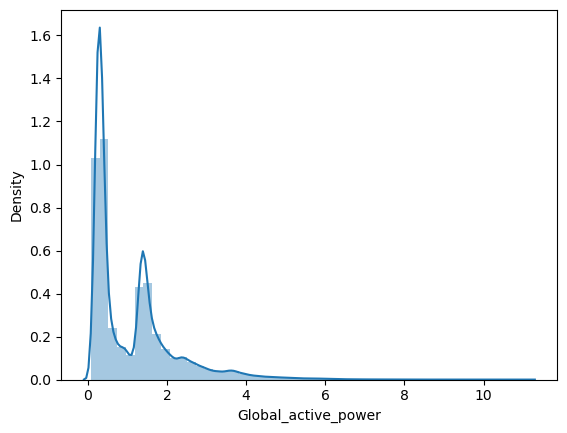

In [17]:
sns.distplot(df['Global_active_power'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power'>

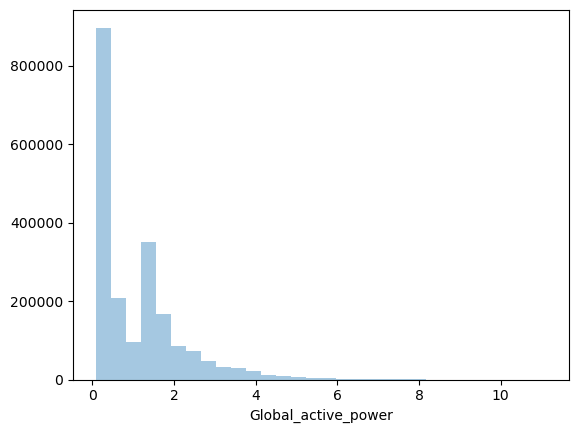

In [18]:
sns.distplot(df['Global_active_power'],kde=False,bins=30)

<AxesSubplot:xlabel='Global_reactive_power'>

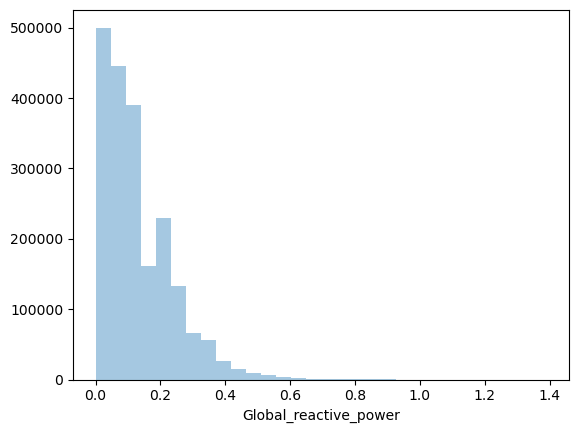

In [19]:
sns.distplot(df['Global_reactive_power'],kde=False,bins=30)

<AxesSubplot:xlabel='Voltage', ylabel='Density'>

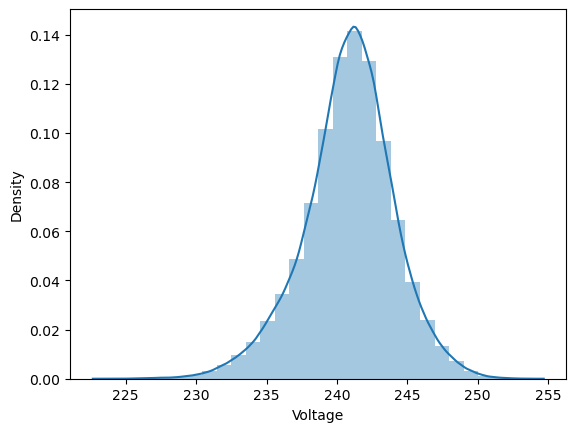

In [20]:
sns.distplot(df['Voltage'],kde=True,bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_intensity', ylabel='Density'>

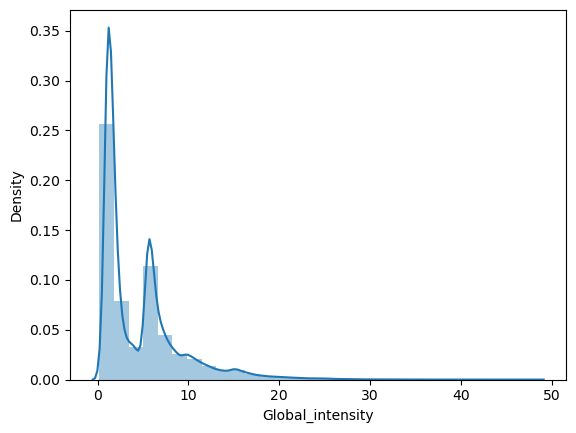

In [21]:
sns.distplot(df['Global_intensity'],kde=True,bins=30)

In [22]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
Sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


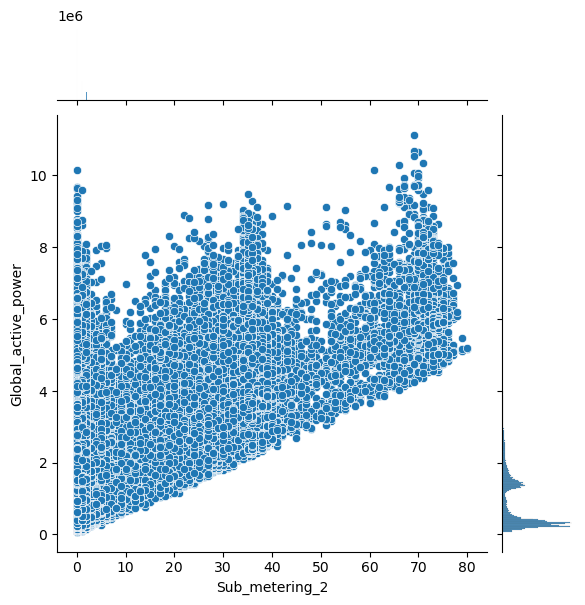

In [23]:
sns.jointplot(x='Sub_metering_2',y='Global_active_power',data=df,kind='scatter')

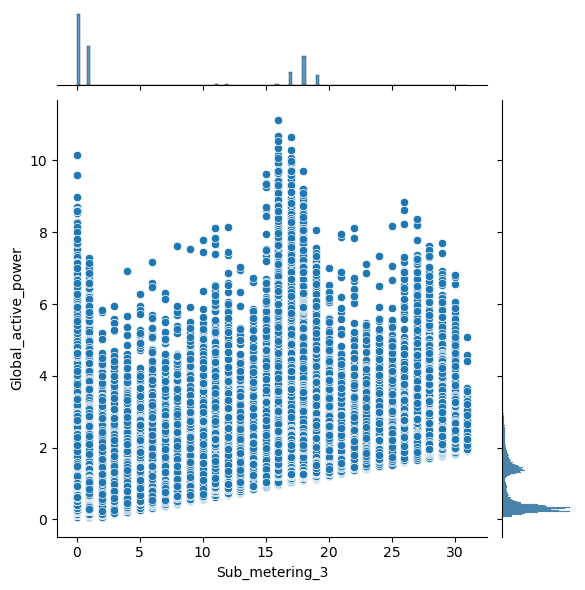

In [32]:
sns.jointplot(x='Sub_metering_3',y='Global_active_power',data=df,kind='scatter')

In [24]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [25]:
x=df.drop(columns=['Global_active_power'])
x.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,
2006-12-16 17:24:00,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [26]:
y=df['Global_active_power']
y.head()

datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [29]:
print(x_train.shape)

(1434496, 7)


In [30]:
print(x_test.shape)

(614784, 7)


In [31]:
print(y_train.shape)

(1434496,)


In [32]:
print(y_test.shape)

(614784,)


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm=LinearRegression()

In [35]:
lm.fit(x_train,y_train)

LinearRegression()

In [36]:
pred=lm.predict(x_test)

In [37]:
pred

array([3.85 , 0.738, 0.222, ..., 1.562, 0.604, 1.534])

In [38]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('R Square value:',metrics.r2_score(y_test,pred))

MAE: 5.4602457327214033e-14
R Square value: 1.0


In [39]:
lm.predict([[0.418,234.84,18.4,0.0,1.0,17.0,52.266667]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.21600002])

In [40]:
import pickle
filename='PCA_model.pkl'
pickle.dump(lm,open(filename,'wb'))